In [1]:
import warnings
warnings.filterwarnings("ignore")

import mplhep as hep
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

import hist
s = hist.tag.Slicer()

from coffea import util

hep.style.use("CMS")

rw = util.load("coffea/VBF_SMEFTsim_topU3l_NP1.coffea")

In [2]:
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('text.latex', preamble=r'\usepackage{amssymb}')
        
wcstring = {}
wcstring['cHWtil'] = r'$\tilde{c}_{HW}$'
wcstring['cHW'] = r'$c_{HW}$'
wcstring['cHj1'] = r'$c_{Hj1}$'
wcstring['cHj3'] = r'$c_{Hj3}$'
wcstring['cHbox'] = r'$c_{Hbox}$'

In [3]:
def plot_with_ratio(wc, name, rwin, h1, h2, h3, rebin=1):
    fig, ax = plt.subplots(3,1,sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]}, figsize=(10,12))
    fig.subplots_adjust(hspace=0)
    
    var = h1.axes[0].name
    rw = rwin[{var:s[::hist.rebin(rebin)]}]
    direct = h1[{var:s[::hist.rebin(rebin)]}]
    
    lin = h2[{var:s[::hist.rebin(rebin)]}]
    quad = h3[{var:s[::hist.rebin(rebin)]}]
    
    # SM for linear and quad is dummy, there is only one weight
    samp = rw + lin + quad
    
    sm = rw[{'wc':'SM'}].values()/(10**6)
    sm_err = np.sqrt(rw[{'wc':'SM'}].variances())/(10**6)
               
    rw_norm = rw[{'wc':wc+'=1.0'}].values()/(10**6)
    rw_norm_err = np.sqrt(rw[{'wc':wc+'=1.0'}].variances())/(10**6)
    direct_norm = direct[{'wc':'SM'}].values()/(10**6)
    direct_norm_err = np.sqrt(direct[{'wc':'SM'}].variances())/(10**6)
    samp_norm = samp[{'wc':'SM'}].values()/(10**6)
    samp_norm_err = np.sqrt(samp[{'wc':'SM'}].variances())/(10**6)
    
    the_bins = rw[{'wc':'SM'}].axes[0].edges
    bin_centers = the_bins[:-1] + 0.5*np.diff(the_bins)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=sm,
               label='SM',
               histtype='step',
               color='black',
               lw=2
               )  
    ax[0].errorbar(bin_centers, sm, yerr=sm_err, linestyle='',color='black',lw=2)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=rw_norm,
               label='SM weighted to '+wcstring[wc]+'=1',
               histtype='step',
               color='tab:red',
               lw=2
               )        
    ax[0].errorbar(bin_centers, rw_norm, yerr=rw_norm_err, linestyle='',color='tab:red',lw=2)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=direct_norm,
               label='Simulated at '+wcstring[wc]+'=1',
               histtype='step',
               color='tab:blue',
               lw=2
               )   
    ax[0].errorbar(bin_centers, direct_norm, yerr=direct_norm_err, linestyle='',color='tab:blue',lw=2)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=samp_norm,
               label='Separate sim. at '+wcstring[wc]+'=1',
               histtype='step',
               color='tab:orange',
               lw=2
               )        
    ax[0].errorbar(bin_centers, samp_norm, yerr=samp_norm_err, linestyle='',color='tab:orange',lw=2)
    
   
    # Ratio panel
    rw_rat = np.divide(rw_norm,sm)#*rw[{'wc':'SM',var:sum}].value
    rw_rat_err = np.divide(rw_norm_err,sm)#*rw[{'wc':'SM',var:sum}].value
    direct_rat = np.divide(direct_norm,sm)#*rw[{'wc':'SM',var:sum}].value
    direct_rat_err = np.divide(direct_norm_err,sm)#*rw[{'wc':'SM',var:sum}].value
    samp_rat = np.divide(samp_norm,sm)#*rw[{'wc':'SM',var:sum}].value
    samp_rat_err = np.divide(samp_norm_err,sm)#*rw[{'wc':'SM',var:sum}].value
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=np.ones(len(the_bins)-1),
               histtype='step',
               color='black',
               lw=2)
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=rw_rat,
               histtype='step',color='tab:red',
               lw=2
               )        
    ax[1].errorbar(bin_centers, rw_rat, yerr=rw_rat_err, linestyle='',color='tab:red',lw=2)
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=direct_rat,
               histtype='step',
               color='tab:blue',
               lw=2
               )   
    ax[1].errorbar(bin_centers, direct_rat, yerr=direct_rat_err, linestyle='',color='tab:blue',lw=2)
      
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=samp_rat,
               histtype='step',
               color='tab:orange',
               lw=2
               )        
    ax[1].errorbar(bin_centers, samp_rat, yerr=samp_rat_err, linestyle='',color='tab:orange',lw=2)
    
    # Second ratio panel
    rw_rat2 = np.divide(rw_norm,direct_norm)#*rw[{'wc':'SM',var:sum}].value
    rw_rat2_err = np.divide(rw_norm_err,direct_norm)#*rw[{'wc':'SM',var:sum}].value
    samp_rat2 = np.divide(samp_norm,direct_norm)#*rw[{'wc':'SM',var:sum}].value
    samp_rat2_err = np.divide(samp_norm_err,direct_norm)#*rw[{'wc':'SM',var:sum}].value
        
    ax[2].hist(the_bins[:-1],
               bins=the_bins,
               weights=np.ones(len(the_bins)-1),
               histtype='step',
               color='tab:blue',
               lw=2)
        
    ax[2].hist(the_bins[:-1],
               bins=the_bins,
               weights=rw_rat2,
               histtype='step',
               color='tab:red',
               lw=2
               )        
    ax[2].errorbar(bin_centers, rw_rat2, yerr=rw_rat2_err, linestyle='',color='tab:red',lw=2)
      
    ax[2].hist(the_bins[:-1],
               bins=the_bins,
               weights=samp_rat2,
               histtype='step',
               color='tab:orange',
               lw=2
               )        
    ax[2].errorbar(bin_centers, samp_rat2, yerr=samp_rat2_err, linestyle='',color='tab:orange',lw=2)

    ax[0].set_ylabel(name,fontsize=18)
    #ax[0].set_ylim(-0.1,0.2)
    if 'GeV' in h1.axes[0].label:
        ax[0].set_yscale('log')
    else:
        ax[0].set_ylim(0, 0.2)
          
    textstr = 'VBF H'
    ax[0].text(0.02, 1.05, textstr, transform=ax[0].transAxes, fontsize=18,
        verticalalignment='top', weight="bold")
        
    ax[1].set_ylabel('Ratio to\nSM',fontsize=18,multialignment='center')
    #ax[1].set_ylim(0.5,2)
    ax[2].set_ylabel('Ratio to\nsim. '+wcstring[wc]+'=1',fontsize=18,multialignment='center')
    ax[2].set_xlabel(h1.axes[0].label)
    
    fig.legend(frameon=False, fontsize=18, bbox_to_anchor=(0.9,0.88))
    
    plotdir = "noteplots/"+wc+"/"
    if not os.path.exists(plotdir):
        os.mkdir(plotdir)
    fig.savefig(plotdir+"overlay_"+var+"_"+wc+".png",bbox_inches='tight')
    fig.savefig(plotdir+"overlay_"+var+"_"+wc+".pdf",bbox_inches='tight')
    
def plot_var(wc, var, name):
    
    direct = util.load("coffea/VBF_SMEFTsim_topU3l_Direct_"+wc+".coffea")
    linear = util.load("coffea/VBF_SMEFTsim_topU3l_Linear_"+wc+".coffea")
    quad   = util.load("coffea/VBF_SMEFTsim_topU3l_Quad_"+wc+".coffea")
    
    h0 = rw[var]
    h1 = direct[var]
    h2 = linear[var]
    h3 = quad[var]

    plot_with_ratio(wc, name, h0, h1, h2, h3, rebin=5)
    
def draw_all_plots(wc):

    plot_var(wc, 'hpt', r'$\frac{d\sigma}{dp_{T}}$ [pb]')
    plot_var(wc, 'detaqq', r'$\frac{d\sigma}{\Delta\eta_{qq}}$ [pb]')
    plot_var(wc, 'dphiqq', r'$\frac{d\sigma}{\Delta\phi_{qq}}$ [pb]')

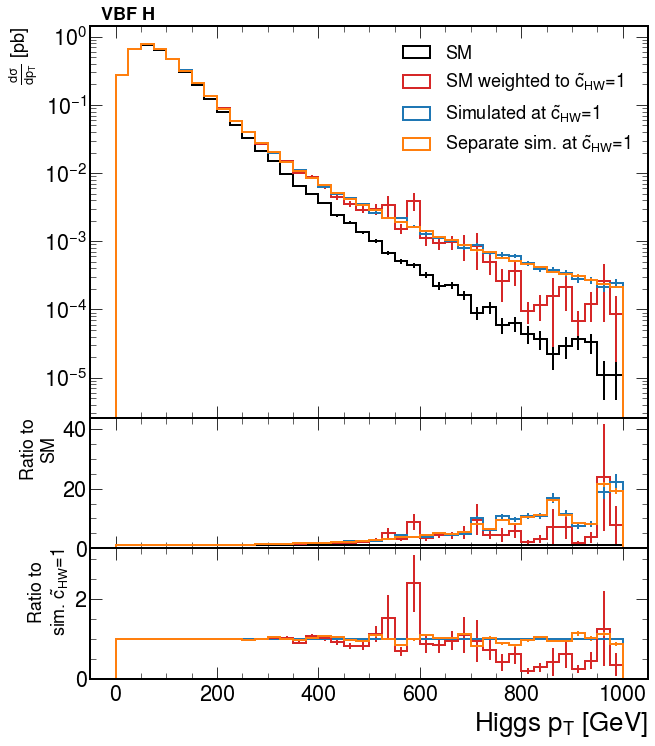

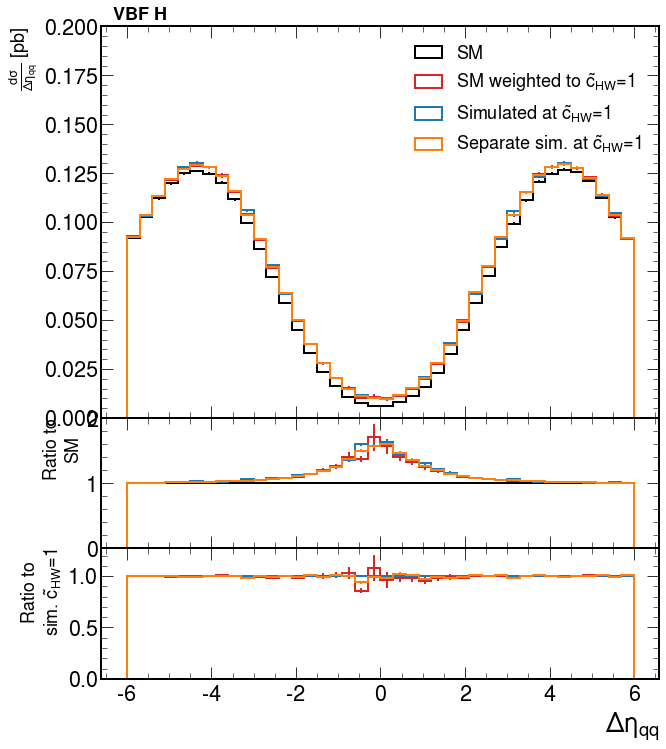

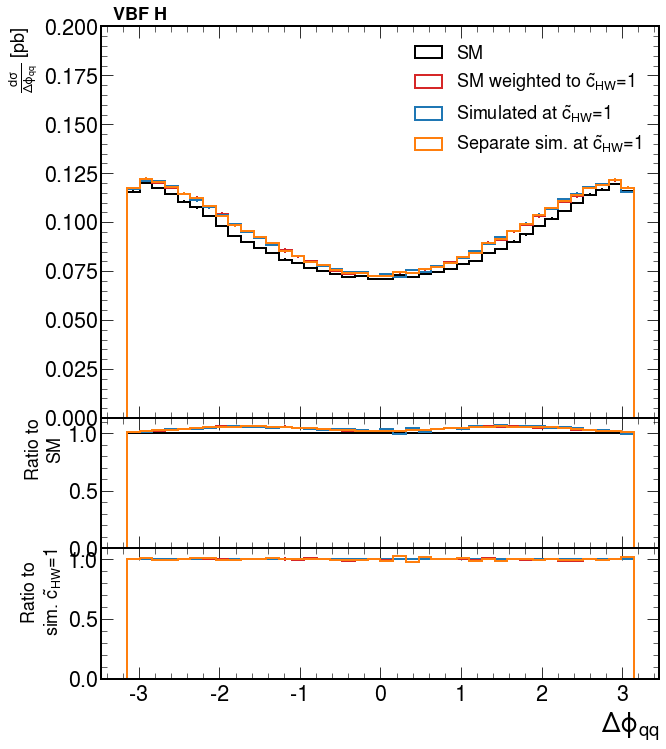

In [4]:
draw_all_plots('cHWtil')

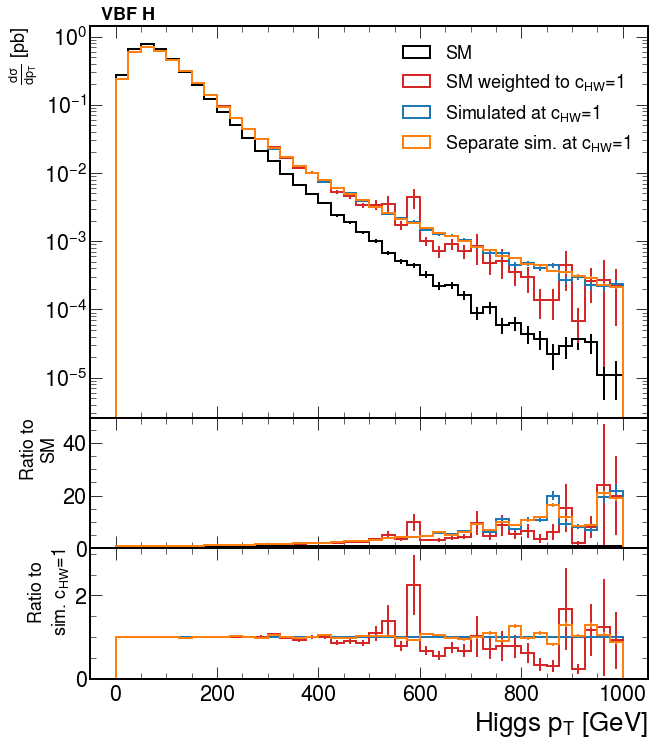

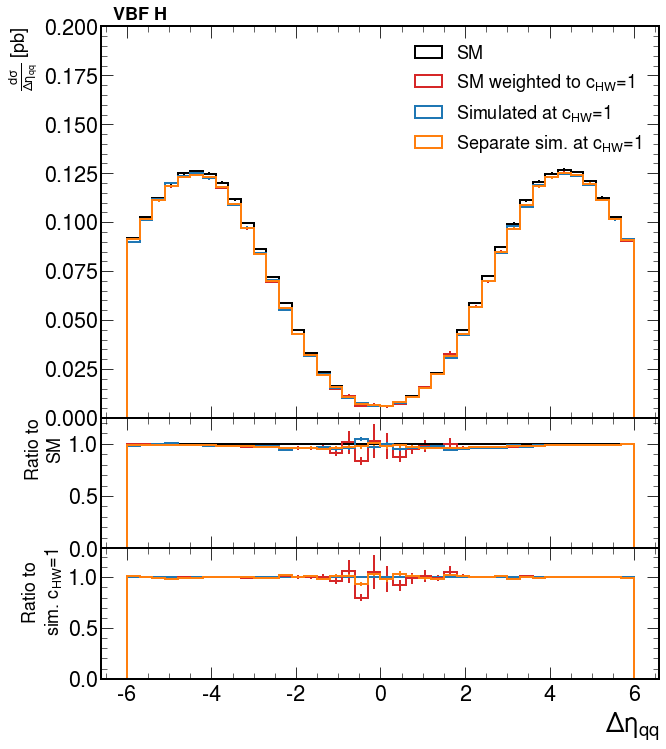

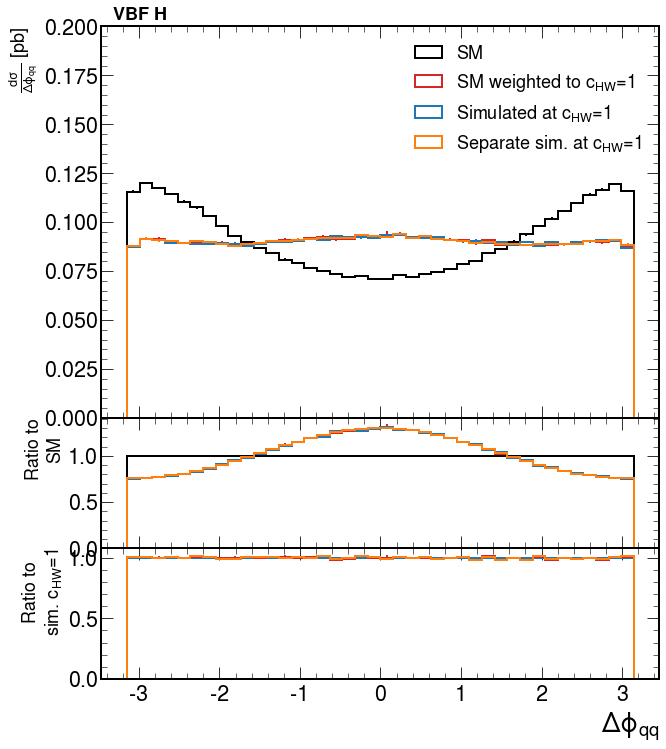

In [5]:
draw_all_plots('cHW')

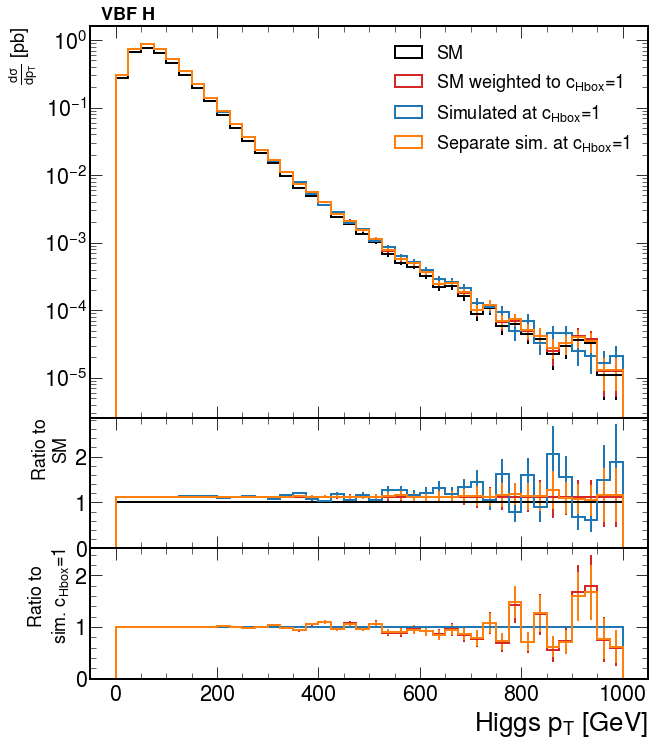

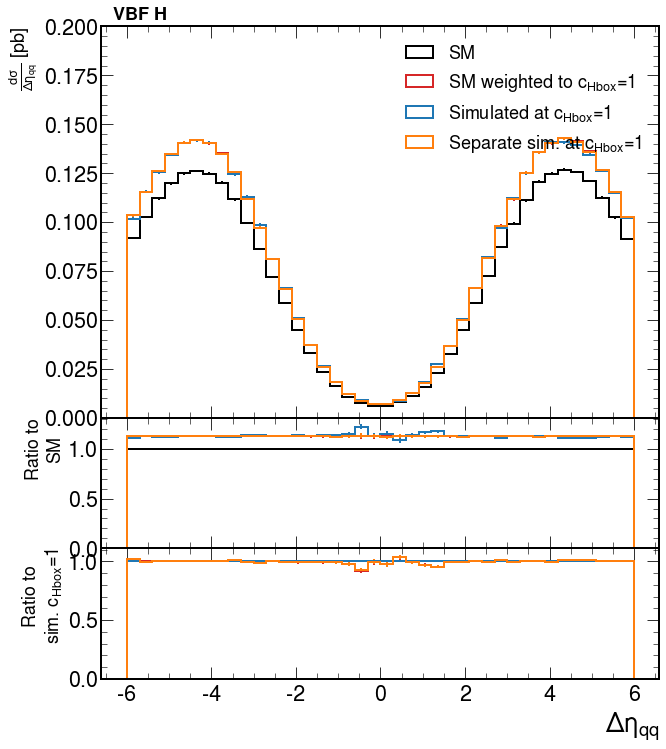

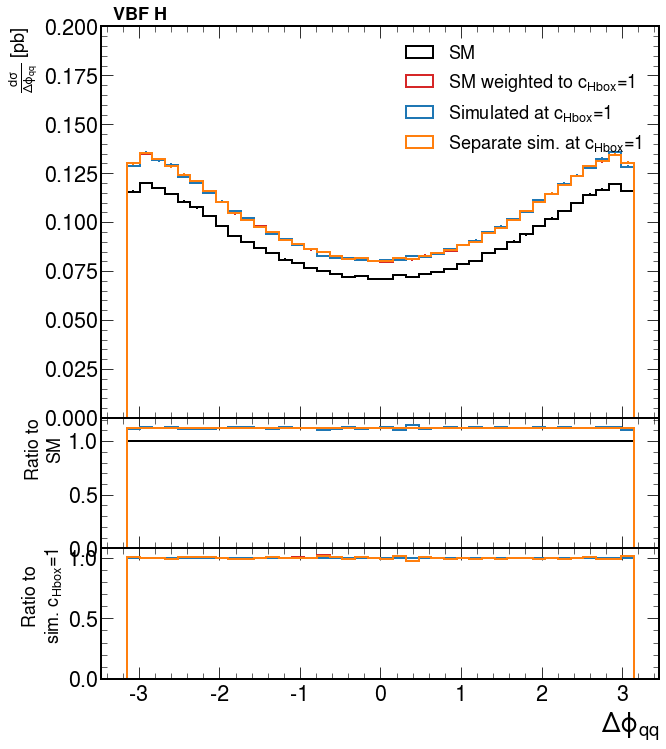

In [6]:
draw_all_plots('cHbox')

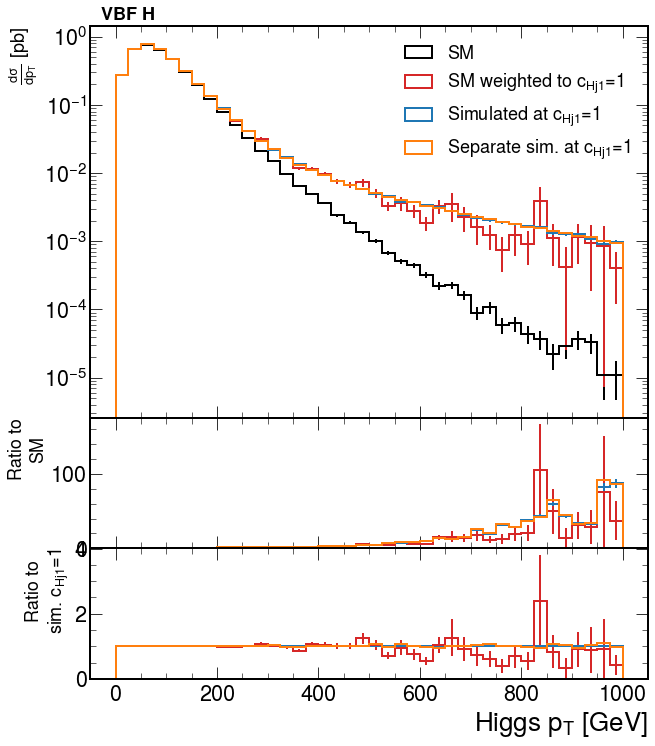

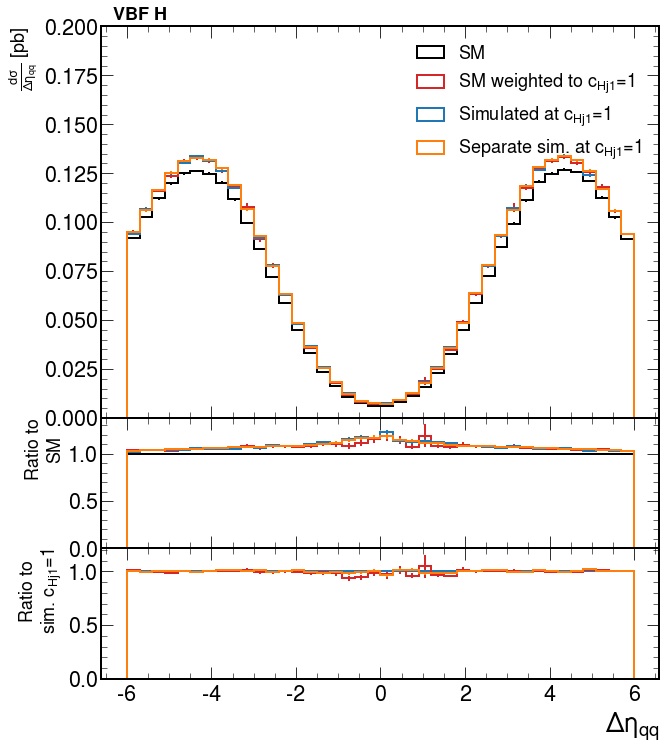

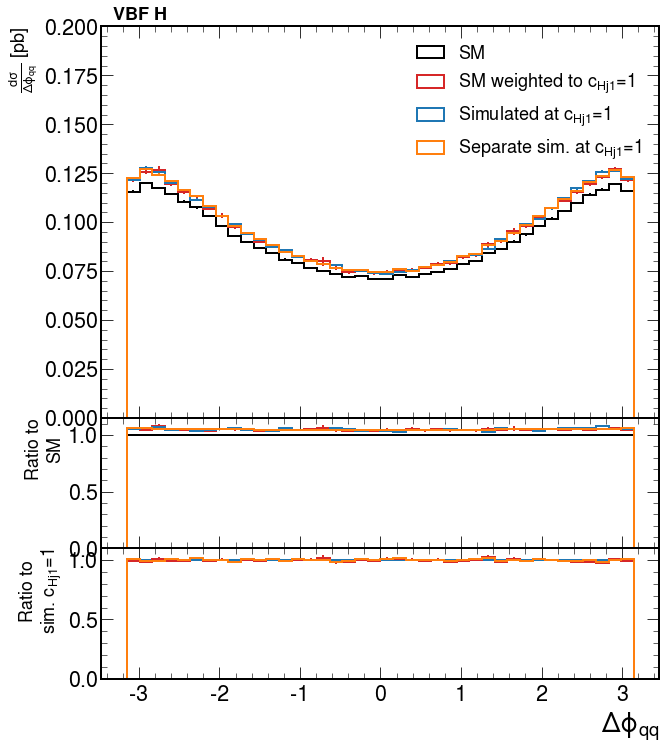

In [7]:
draw_all_plots('cHj1')

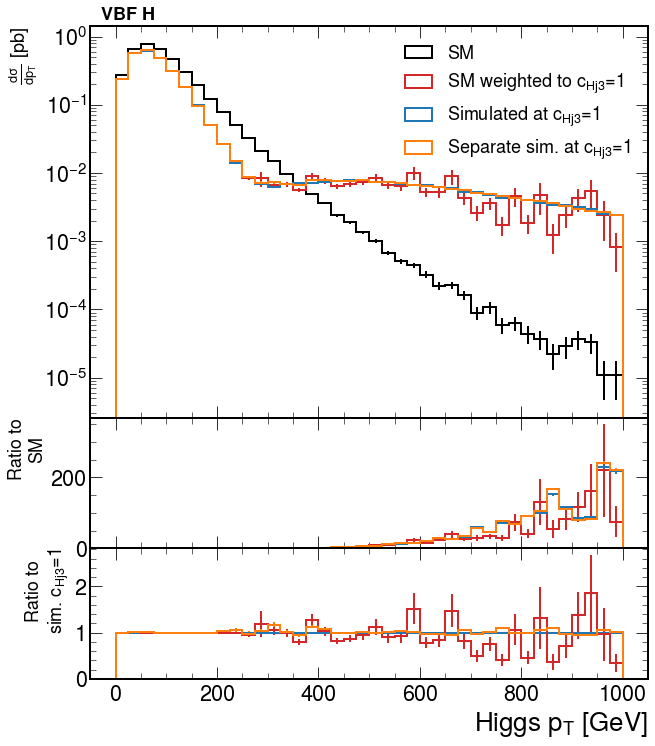

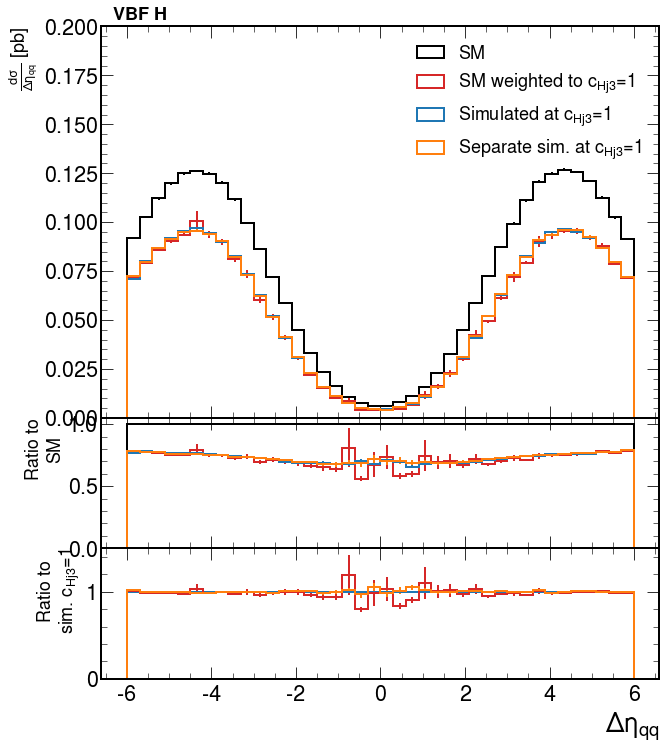

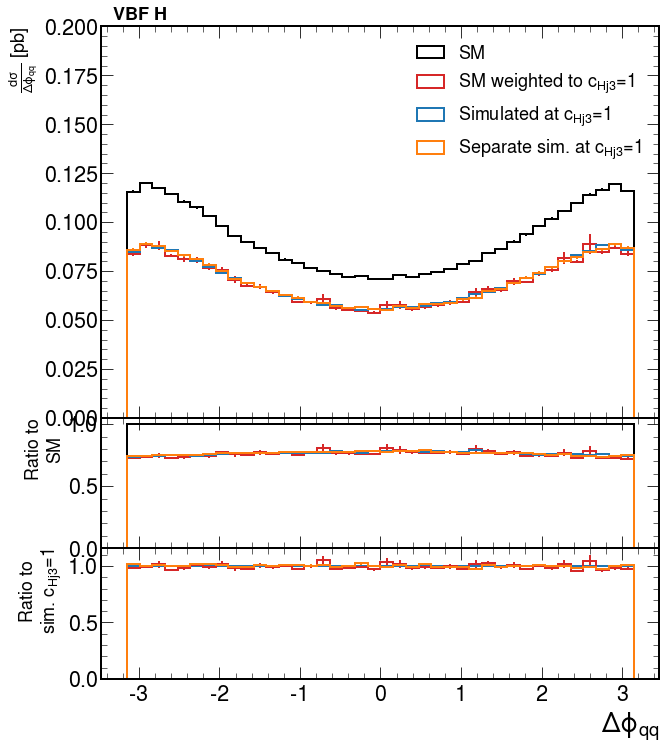

In [8]:
draw_all_plots('cHj3')